In [17]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
import os

#20-08-05부터 23-11-10 까지의 데이터 사용
KRvideo = pd.read_csv("KR_youtube_trending_data.csv", engine="python")

#데이터 정보 요약
KRvideo.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234354 entries, 0 to 234353
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           234354 non-null  object
 1   title              234354 non-null  object
 2   publishedAt        234354 non-null  object
 3   channelId          234354 non-null  object
 4   channelTitle       234354 non-null  object
 5   categoryId         234354 non-null  int64 
 6   trending_date      234354 non-null  object
 7   tags               234354 non-null  object
 8   view_count         234354 non-null  int64 
 9   likes              234354 non-null  int64 
 10  dislikes           234354 non-null  int64 
 11  comment_count      234354 non-null  int64 
 12  thumbnail_link     234354 non-null  object
 13  comments_disabled  234354 non-null  bool  
 14  ratings_disabled   234354 non-null  bool  
 15  description        229886 non-null  object
dtypes: bool(2), int64(5)

In [18]:
df = KRvideo[["publishedAt", "title", "channelTitle", "view_count", "tags"]]
df

,publishedAt,title,channelTitle,view_count,tags
0,2020-08-09T09:32:48Z,안녕하세요 보겸입니다,보겸 BK,5947503,보겸|bokyem
1,2020-08-12T09:00:08Z,부락토스의 계획 [총몇명 프리퀄],총몇명,963384,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리
2,2020-08-10T09:54:13Z,평생 반성하면서 살겠습니다.,양팡 YangPang,2950885,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...
3,2020-08-11T15:00:58Z,안녕하세요 꽈뚜룹입니다.,꽈뚜룹 Quaddurup,1743374,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...
4,2020-08-11T09:00:13Z,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,JYP Entertainment,3433885,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...
...,...,...,...,...,...
234349,2023-10-26T12:23:46Z,김태형 감독 2일차,Giants TV,581492,롯데자이언츠|자이언츠|자이언츠tv|자이언츠티비|자이언츠TV|롯데자이언츠TV|롯데|부...
234350,2023-10-23T08:58:09Z,SEVENTEEN (세븐틴) '음악의 신' Official MV,HYBE LABELS,45066502,HYBE|HYBE LABELS|하이브|하이브레이블즈
234351,2023-10-26T10:00:04Z,남사친의 검은 속내,내 이름은 카더가든,405260,카더가든|carthegarden|내이름은카더가든|차정원|별명|아바타소개팅|소개팅|아...
234352,2023-10-26T09:23:57Z,모르는 사람 6명이 밥먹는 신개념 식당,빅페이스 BIGFACE,479412,오마카세 추천|코스요리 먹방|오마카세 먹방|소셜 다이닝|소셜다이닝|코스 요리|춘천닭...


In [23]:
# 조회수 순으로 정렬
df_sorted = df.sort_values(by='view_count', ascending=False)

# 체널명과 영상 제목이 중복 데이터를 제거
df_sorted_latest = df_sorted.drop_duplicates(['title','channelTitle'], keep='first')

# 원하는 년도 (ex : 2023)의 데이터만 추출
df_sorted_y = df_sorted_latest['publishedAt'].str.contains("2021")
df_23 = df_sorted_latest[df_sorted_y]
df_23


,publishedAt,title,channelTitle,view_count,tags
55138,2021-05-21T03:46:13Z,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,296314174,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄
67539,2021-07-09T03:59:12Z,BTS (방탄소년단) 'Permission to Dance' Official MV,HYBE LABELS,194795844,HYBE|HYBE LABELS|하이브|하이브레이블즈
79542,2021-09-10T04:00:13Z,LISA - 'LALISA' M/V,BLACKPINK,192376395,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
41350,2021-03-12T05:00:15Z,ROSÉ - 'On The Ground' M/V,BLACKPINK,117461115,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
86343,2021-10-14T23:00:11Z,Adele - Easy On Me (Official Video),AdeleVEVO,114925848,There ain’t no gold|In this river|That I’ve be...
...,...,...,...,...,...
28930,2021-01-17T09:45:00Z,그래서 너프야?아니야? 저렴해진 플래그십 갤럭시S21/S21U 좋아지고 나빠진점.,에이트 ATE,33121,갤럭시S21|갤럭시S21U|갤럭시S21 울트라|갤럭시s21 색상|갤럭시s21 가격|...
27146,2021-01-07T02:29:17Z,전북 전 지역 대설·한파특보 발효… | 2021.01.07 목 KBS뉴스특보,KBS전주,31424,새만금스카우트|개그콘서트|송영길|정승환|이휘현|김혜선|개그맨|개그우먼|pd
28934,2021-01-17T05:16:00Z,해부심을걸고 싸우는 기수빨없는 해병대 vs 해병대의 아이스 클라이밍 대결ㅋㅋㅋ 20...,율리예스 _ 레게놈,27991,#스포츠클라이밍|#클라이밍|#트리플비|#암벽화|#헬창|#전신운동|#하면하지|#뜨거운...
28245,2021-01-17T05:16:00Z,해부심을걸고 싸우는 기수빨없는 해병대 vs 해병대의 아이스 클라이밍 대결ㅋㅋㅋ 20...,율리예스,24643,#스포츠클라이밍|#클라이밍|#트리플비|#암벽화|#헬창|#전신운동|#하면하지|#뜨거운...


In [24]:
# 채널별 조회수 합계 계산
df_channel_view_sum = df_23.groupby(['channelTitle']).sum()

# 채널별 조회수 내림차순 정렬
df_channel_view = df_channel_view_sum.sort_values(by='view_count', ascending=False)

# 출력
df_channel_view


,publishedAt,title,view_count,tags
channelTitle,,,,
HYBE LABELS,2021-05-21T03:46:13Z2021-07-09T03:59:12Z2021-0...,BTS (방탄소년단) 'Butter' Official MVBTS (방탄소년단) 'P...,962106737,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄HYBE|HYBE LABEL...
SMTOWN,2021-10-05T09:00:00Z2021-05-17T09:00:02Z2021-0...,aespa 에스파 'Savage' MVaespa 에스파 'Next Level' MV...,864077636,aespa|savage|mv|music video|karina|giselle|win...
BANGTANTV,2021-07-30T13:00:02Z2021-07-23T13:00:01Z2021-0...,Let's just have fun with your loved ones!😎 #Pe...,685698579,[None]방탄 챌린지|방탄소년단 챌린지|BTS 챌린지|BTS Challenge|B...
BLACKPINK,2021-09-10T04:00:13Z2021-03-12T05:00:15Z2021-0...,LISA - 'LALISA' M/VROSÉ - 'On The Ground' M/VL...,590091524,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
JYP Entertainment,2021-06-09T08:58:12Z2021-04-30T04:00:16Z2021-1...,TWICE Alcohol-Free M/VITZY 마.피.아. In the morni...,547880437,TWICE|트와이스|taste of love|alcoholfree|alcoholfr...
...,...,...,...,...
포메디언,2021-01-10T11:31:37Z,티져))역대급 전설의 시작! 대한민국의 떠들썩하게 만들 4명의 남자가 뭉쳤다!! 4...,40931,포메디언|코미디|개그|코미디빅리그|코빅|꼰대희|얼간김준호|김준호|김대희|권재관|박영...
청년피자,2021-01-26T09:15:00Z,[청년피자X임영웅]청년피자 300호점 돌파 축하 영상,37018,[None]
율리예스 _ 레게놈,2021-01-17T05:16:00Z,해부심을걸고 싸우는 기수빨없는 해병대 vs 해병대의 아이스 클라이밍 대결ㅋㅋㅋ 20...,27991,#스포츠클라이밍|#클라이밍|#트리플비|#암벽화|#헬창|#전신운동|#하면하지|#뜨거운...


In [25]:
# 데이터 중에 tags가 없는 체널을 제거
df_23_filter = df_channel_view[~df_channel_view['tags'].str.contains('None')]
# 필터링된 데이터의 상위 20개의 채널만 추출
df_23_filter_top20 = df_23_filter[:20]
# 상위 20개의 데이터 인덱싱
df_23_filter_top20_index = df_23_filter_top20.reset_index()
df_23_filter_top20_index

#50만 기준 조회수 순
#df_middle = df_sorted_latest['view_count'] <=500000
#df_middle_data = df_sorted_latest[df_middle]

#df_middle_data.head(10)

,channelTitle,publishedAt,title,view_count,tags
0,HYBE LABELS,2021-05-21T03:46:13Z2021-07-09T03:59:12Z2021-0...,BTS (방탄소년단) 'Butter' Official MVBTS (방탄소년단) 'P...,962106737,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄HYBE|HYBE LABEL...
1,BLACKPINK,2021-09-10T04:00:13Z2021-03-12T05:00:15Z2021-0...,LISA - 'LALISA' M/VROSÉ - 'On The Ground' M/VL...,590091524,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
2,JYP Entertainment,2021-06-09T08:58:12Z2021-04-30T04:00:16Z2021-1...,TWICE Alcohol-Free M/VITZY 마.피.아. In the morni...,547880437,TWICE|트와이스|taste of love|alcoholfree|alcoholfr...
3,AdeleVEVO,2021-10-14T23:00:11Z,Adele - Easy On Me (Official Video),114925848,There ain’t no gold|In this river|That I’ve be...
4,1theK (원더케이),2021-01-27T09:00:00Z2021-03-25T09:00:31Z2021-0...,[MV] IU(아이유) _ Celebrity[MV] IU(아이유)_LILAC(라일락...,112325201,K-POP|Kpop|1theK|원더케이|Original|1theK Original|...
5,starshipTV,2021-12-01T09:00:03Z2021-06-01T09:00:18Z2021-1...,IVE 아이브 'ELEVEN' MVMONSTA X 몬스타엑스 'GAMBLER' MV...,102993082,Kpop|girl group|1theK|Starshiptv|starship|뮤비|티...
6,채널 십오야,2021-05-07T14:04:23Z2021-05-07T13:45:22Z2021-0...,"[sub] 🧳💜2-2 단언컨대, 방탄 역사상 가장 난장판이 될 게임^^ | 🧳출장...",102163962,나영석|나PD|아간세|아이슬란드간세끼|이수근|수근세끼|은지원|지원세끼|삼시세끼|세끼...
7,Stone Music Entertainment,2021-05-25T09:00:23Z2021-12-01T09:00:56Z2021-0...,EVERGLOW (에버글로우) - FIRST MVEVERGLOW (에버글로우) - ...,98589661,K-CULTURE korean Music MV Music Video K-Pop Kp...
8,THEBLACKLABEL,2021-10-29T09:00:12Z2021-08-02T09:00:15Z2021-1...,JEON SOMI (전소미) - 'XOXO' M/VSOMI (전소미) - 'DUMB...,98412640,KPOP|K-POP|SOMI|Jeon Somi|전소미|소미|blackpink|yg ...
9,소맥거핀,2021-09-26T07:31:20Z2021-10-12T08:53:50Z2021-1...,오징어 게임 3분 요약 [Squid Game 3 minutes summary]오겜 ...,91094854,메이플|메이플스토리|메이플 만화|게임 만화|병맛|웃긴|만화|루시드냥|소맥거핀|애니메...


<Axes: xlabel='view_count', ylabel='channelTitle'>

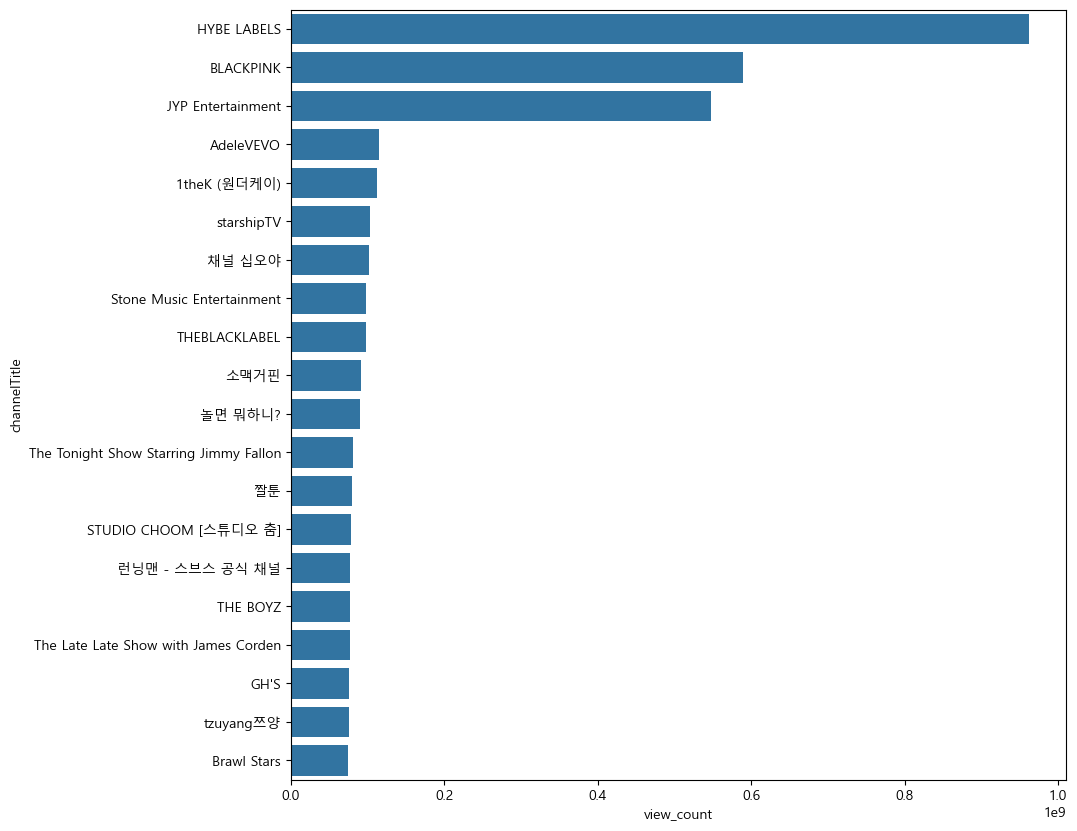

In [26]:
# 그래프 출력 시 이상한 에러들 무시
import warnings
warnings.filterwarnings("ignore")

# 그래프 그릴 때 한글 깨짐 방지 설정
import os

# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")

# 그래프 사이즈 설정
plt.figure(figsize=(10,10))

# seaborn 패키지로 수평막대 그래프 그리기
sns.barplot(x='view_count', y='channelTitle', data=df_23_filter_top20_index)